In [1]:
import numpy as np
import pandas as pd
# leitura do banco de dados
input_file = '/Users/aurelianosancho/Downloads/Exemplos-main/classificacao_Q2.csv'
df = pd.read_csv(input_file)

In [2]:
df.columns

Index(['v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'target'],
      dtype='object')

In [3]:
X = df[['v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13']]
y = df.target

In [4]:
X = np.array(X)
y = np.array(y).reshape(-1,)

Automatically created module for IPython interactive environment
-------------------------
Nearest Neighbors
Acuracy:  0.775
Precision:  0.775
Recall:  0.775
Score:  0.775
-------------------------
-------------------------
Linear SVM
Acuracy:  0.786
Precision:  0.786
Recall:  0.786
Score:  0.786
-------------------------
-------------------------
RBF SVM
Acuracy:  0.797
Precision:  0.797
Recall:  0.797
Score:  0.797
-------------------------
-------------------------
Gaussian Process
Acuracy:  0.802
Precision:  0.802
Recall:  0.802
Score:  0.802
-------------------------
-------------------------
Decision Tree
Acuracy:  0.797
Precision:  0.797
Recall:  0.797
Score:  0.797
-------------------------
-------------------------
Random Forest
Acuracy:  0.804
Precision:  0.804
Recall:  0.804
Score:  0.804
-------------------------
-------------------------
Neural Net
Acuracy:  0.798
Precision:  0.798
Recall:  0.798
Score:  0.798
-------------------------
-------------------------
AdaBoost
Ac

<Figure size 2160x360 with 0 Axes>

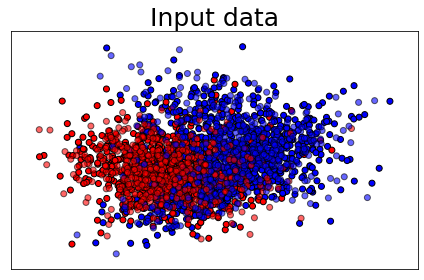

In [12]:
print(__doc__)


# Aparentemente funciona para casos binários

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","VotingClassifier"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


linearly_separable = (X, y)

datasets = [linearly_separable]

figure = plt.figure(figsize=(30, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if ds_cnt == 0:
        ax.set_title("Input data",size=25)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        #print(score)
        #print(y_test)
        print('-------------------------')
        print(name)
        print('Acuracy: ', accuracy_score(y_test, y_pred))
        print('Precision: ', precision_score(y_test, y_pred, average='micro'))
        print('Recall: ' , recall_score(y_test, y_pred, average='micro'))
        print('Score: ', score)
        print('-------------------------')

        i += 1

plt.tight_layout()
plt.show()

In [ ]:
#end